## Amazon Review Sentiment Analysis using LSTM and Word2Vec

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/NLP/Amazon2.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
df1 = df[['reviews.rating','reviews.text']]
df1 = df1.sample(frac = 1) 
df1.head()

,reviews.rating,reviews.text
5073,5,Still testing them and comparing with other br...
9130,5,Good
20884,4,Wife loves her Kindle and has used it for year...
20511,5,"Perfect for our grandson, mom loves the parent..."
13252,5,"Love it, love it!!! Have had several different..."


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28332 entries, 5073 to 2260
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.rating  28332 non-null  int64 
 1   reviews.text    28332 non-null  object
dtypes: int64(1), object(1)
memory usage: 664.0+ KB


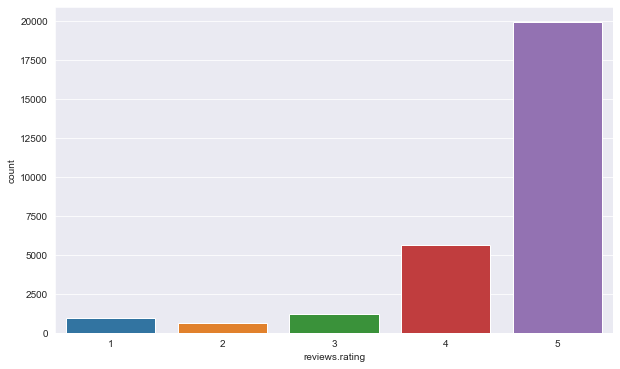

In [34]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
ax = sns.countplot(x="reviews.rating", data=df1)

## Feature Engineering

### Classifying the rating column based on the ratings [1-4] rating as not satisfactory and 5 rating as excellent as from the above plot it can be seen that data is imbalanced so in order to sort it classifying it 

In [9]:
df2 = df1.copy()
bins = (1, 4, 5)
group_names = ['not satisfactory','excellent']
df2['reviews.rating'] = pd.cut(df2['reviews.rating'], bins = bins, labels = group_names)
df2.head()

,reviews.rating,reviews.text
5073,excellent,Still testing them and comparing with other br...
9130,excellent,Good
20884,not satisfactory,Wife loves her Kindle and has used it for year...
20511,excellent,"Perfect for our grandson, mom loves the parent..."
13252,excellent,"Love it, love it!!! Have had several different..."


In [10]:
df2['reviews.rating'].value_counts()

excellent           19897
not satisfactory     7470
Name: reviews.rating, dtype: int64

In [8]:
df1['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

## Data Preprocessing 

### Step 1 : Converting the column to list for preprocessing

In [11]:
X = df2['reviews.text'].to_list()
from nltk.corpus import stopwords
stops = stopwords.words("English")
import string
X[:5]

['Still testing them and comparing with other brands. So far i think they are great batteries and for the price and convenience i think they are great. Will buy more for sure.',
 'Good',
 'Wife loves her Kindle and has used it for years. Thought it was time to update to take advantage of new features and bigger display.',
 'Perfect for our grandson, mom loves the parental controls and I love the no questions asked replacement policy!',
 'Love it, love it!!! Have had several different models. like this one the best. The Kindle Fire was nice but had a hard time reading at night.']

## To input data into the any model, the data input must be in vector form. We will do the following transformations:

### Remove punctuation and numbers
### Transform all words to lower-case
### Remove stop words (e.g. the, a, that, this, it, …)
### Convert the sentences into vectors, using a word embedding technique (word2vec) representation
### Perforing Stemming too strip off prefixes and suffixes in the word and convert the word into its base form

In [12]:
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

## Remove digits ##
digits = [str(x) for x in range(10)]
remove_digits = [full_remove(x, digits) for x in X]

## Remove punctuation ##
remove_punc = [full_remove(x, list(string.punctuation)) for x in remove_digits]

## Make everything lower-case and remove any white space ##
sents_lower = [x.lower() for x in remove_punc]
sents_lower = [x.strip() for x in sents_lower]

## Remove stop words ##
from nltk.corpus import stopwords
stops = stopwords.words("English")

def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt

sents_processed = [removeStopWords(stops,x) for x in sents_lower]

In [13]:
sents_processed[:2]

['still testing comparing brands far think great batteries price convenience think great buy sure',
 'good']

In [14]:
import nltk
def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

porter = [stem_with_porter(x.split()) for x in sents_processed]

porter = [" ".join(i) for i in porter]

porter[:10]

['still test compar brand far think great batteri price conveni think great buy sure',
 'good',
 'wife love kindl use year thought time updat take advantag new featur bigger display',
 'perfect grandson mom love parent control love question ask replac polici',
 'love love sever differ model like one best kindl fire nice hard time read night',
 'bought kindl fire replac broken ipad date updat love parent control case savior drop daughter love size tablet year replac plan year unlimit freespac make perfect tablet child love ask everytim want new game video chose expand memori gb microsd worri run storag space complaint batteri life anywher near power ipad keep charger',
 'first time tri amazon batteri far good guess see long last',
 'product deliv time promis',
 'problem',
 'difficult connect tube frustrat']

In [15]:
voc_size=8000
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in porter] 
onehot_repr[:10]

[[585,
  1736,
  1420,
  6960,
  7186,
  3537,
  7844,
  1842,
  664,
  3340,
  3537,
  7844,
  7384,
  5507],
 [4849],
 [4655,
  1521,
  4179,
  5621,
  4040,
  5607,
  424,
  3805,
  6124,
  4157,
  6553,
  6758,
  295,
  97],
 [4625, 553, 1999, 1521, 4646, 5698, 1521, 7469, 6631, 4068, 6229],
 [1521,
  1521,
  5267,
  1910,
  6564,
  6157,
  4897,
  2212,
  4179,
  2240,
  5179,
  808,
  424,
  2465,
  2644],
 [3324,
  4179,
  2240,
  4068,
  3725,
  1134,
  4729,
  3805,
  1521,
  4646,
  5698,
  1708,
  4854,
  1674,
  5166,
  1521,
  7339,
  7075,
  4040,
  4068,
  6220,
  4040,
  2353,
  1787,
  1019,
  4625,
  7075,
  7181,
  1521,
  6631,
  5056,
  7191,
  6553,
  550,
  590,
  3322,
  6165,
  2135,
  7907,
  4900,
  5686,
  3263,
  1642,
  5724,
  1764,
  1842,
  4321,
  7021,
  6016,
  4950,
  1134,
  5110,
  3729],
 [590, 424, 1730, 429, 1842, 7186, 4849, 356, 5932, 2657, 4633],
 [6214, 4290, 424, 6935],
 [3617],
 [6702, 4245, 5682, 2806]]

## Loading the required Libraries

In [35]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SpatialDropout1D

In [17]:
sent_length=80
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 7844 7384 5507]
 [   0    0    0 ...    0    0 4849]
 [   0    0    0 ... 6758  295   97]
 ...
 [   0    0    0 ... 1842 3263 2512]
 [   0    0    0 ... 1842 5038 2230]
 [   0    0    0 ...    0 7844 7384]]


### Converting the rating columns into dummy variables for the purpose of Dense Layer as it is the output layer which require separate dense layer for each unique class value

In [18]:
Y = pd.get_dummies(df2['reviews.rating'])
Y

,not satisfactory,excellent
5073,0,1
9130,0,1
20884,1,0
20511,0,1
13252,0,1
...,...,...
10918,0,1
13244,0,1
18653,0,1
7763,1,0


In [20]:
X_final=np.array(embedded_docs)
y_final=np.array(Y)

## Create LSTM networks

In [21]:
EMBEDDING_DIM = 100 
model = Sequential()
model.add(Embedding(voc_size, EMBEDDING_DIM, input_length=sent_length))
model.add(LSTM(250, dropout=0.2,return_sequences=True))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 100)           800000    
_________________________________________________________________
lstm (LSTM)                  (None, 80, 250)           351000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               240600    
_________________________________________________________________
dense (Dense)                (None, 2)                 302       
Total params: 1,391,902
Trainable params: 1,391,902
Non-trainable params: 0
_________________________________________________________________
None


## Splitting the train and test data and fiting the model in the LST network

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
310/310 [==============================] - 445s 1s/step - loss: 0.5116 - accuracy: 0.7359 - val_loss: 0.4707 - val_accuracy: 0.7646
Epoch 2/5
310/310 [==============================] - 377s 1s/step - loss: 0.4466 - accuracy: 0.7840 - val_loss: 0.4604 - val_accuracy: 0.7801
Epoch 3/5
310/310 [==============================] - 373s 1s/step - loss: 0.4092 - accuracy: 0.8053 - val_loss: 0.4505 - val_accuracy: 0.7841
Epoch 4/5
310/310 [==============================] - 373s 1s/step - loss: 0.3701 - accuracy: 0.8280 - val_loss: 0.4548 - val_accuracy: 0.7886
Epoch 5/5
310/310 [==============================] - 371s 1s/step - loss: 0.3348 - accuracy: 0.8449 - val_loss: 0.4559 - val_accuracy: 0.7987


### What any classification neural network outputs is a probability distribution over the class indices, meaning that the network assigns one probability to each class. The sum of these probabilities is 1.0. Then the network is trained to assign the highest probability to the correct class, so to recover the class index from the probabilities you have to take the location (index) that has the maximum probability. This is done with the argmax operation.

In [26]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
len(y_pred)

8500

In [27]:
Y_test=np.argmax(y_test, axis=1)
len(Y_test)

8500

### Evaluating the model by ploting the Confusion Matrix and generating the Classification report for the predicted values in order to know how well my model has performed

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1224, 1251],
       [ 460, 5565]], dtype=int64)

Text(34.0, 0.5, 'Truth')

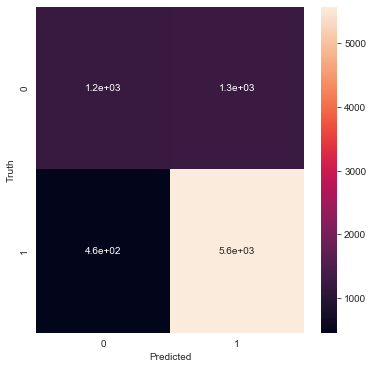

In [31]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
from sklearn import metrics
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.49      0.59      2475
           1       0.82      0.92      0.87      6025

    accuracy                           0.80      8500
   macro avg       0.77      0.71      0.73      8500
weighted avg       0.79      0.80      0.79      8500

